In [280]:
import pandas as pd
import pandera as pa
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import numpy as np

In [293]:
#import text files as data frames

path_array = ['data/Births.txt', 'data/bltper_1x1.txt','data/Deaths_1x1.txt','data/E0per.txt','data/Mx_1x1.txt','data/Population.txt']

dfs = {}

for i in path_array:
    file_data = pd.read_csv(i, delim_whitespace=True)
    # Get the file name without the extension
    name = i.split("/")[-1].split(".")[0]
    dfs[name] = pd.DataFrame(file_data)

births_df = dfs['Births']
bltper_df = dfs['bltper_1x1']
deaths_df = dfs['Deaths_1x1']
e0per_df = dfs['E0per']
mx_df = dfs['Mx_1x1']
population_df = dfs['Population']   

In [294]:
#import csvs as dataframes

path_array = ['data/h11ar.csv', 'data/p01ar.csv']

dfs = {}

for i in path_array:
    file_data = pd.read_csv(i, delimiter = ",")
    # Get the file name without the extension
    name = i.split("/")[-1].split(".")[0]
    dfs[name] = pd.DataFrame(file_data)

income_df = dfs['h11ar']
per_capita_df = dfs['p01ar']
income_df.head()

,Size of Household\r\nand year,Number (thousands),Median Income Current dollars,Median Income 2022 dollars,Mean Income Current dollars,Mean Income 2022 dollars,Average size of household
0,2022,"131,400","74,580","74,580","106,400","106,400",2.51
1,2021,"131,200","70,780","76,330","102,300","110,300",2.50
2,2020 (41),"129,200","68,010","76,660","97,470","109,900",2.54
3,2019,"128,500","68,700","78,250","98,090","111,700",2.53
4,2018,"128,600","63,180","73,030","90,020","104,100",2.52


In [296]:
##INCOME and PER CAPITA CLEANING

#Removing "(#)" in Size of households\nand year for income and per_capita
income_df['Size of Household\r\nand year'] = income_df['Size of Household\r\nand year'].str.replace(r'\(\d+\)', '', regex=True)
per_capita_df['Year'] = per_capita_df['Year'].str.replace(r'\(\d+\)', '', regex=True)

#Renaming "Size of Household\nand year" to "Year"
income_df.rename(columns={'Size of Household\r\nand year': 'Year'}, inplace=True)
per_capita_df.rename(columns={'Year': 'Year'}, inplace=True)

# Convert all to integer
income_columns_to_convert = ['Number (thousands)', 'Median Income Current dollars', 'Median Income 2022 dollars', 'Mean Income Current dollars', 'Mean Income 2022 dollars']
income_df[income_columns_to_convert] = income_df[income_columns_to_convert].replace({',': ''}, regex=True).astype(np.int64)

per_capita_columns_to_convert = ['Population in thousands', 'Per capita income Current dollars', 'Per capita income 2022 dollars']
per_capita_df[per_capita_columns_to_convert] = per_capita_df[per_capita_columns_to_convert].replace({',': ''}, regex=True).astype(np.int64)

In [297]:
### BLTPER CLEANING
# Drop unneeded variables from bltper_df dataset and rename columns
bltper_df.rename(columns={'mx': 'Annual Death Rate','qx':'Probability of Death', 'dx':'Number of Deaths','ex': 'Life Expectancy'}, inplace=True)
bltper_df = bltper_df[['Year','Age','Annual Death Rate','Probability of Death','Number of Deaths','Life Expectancy']]



# Convert values to int64 and int
bltper_df[['Annual Death Rate', 'Probability of Death']] = bltper_df[['Annual Death Rate', 'Probability of Death']].astype(float)
bltper_df[['Number of Deaths', 'Life Expectancy']] = bltper_df[['Number of Deaths', 'Life Expectancy']].astype(int)


# Convert 'Age' column 
bltper_df['Age'] = pd.to_numeric(bltper_df['Age'], errors='coerce')
bltper_df['Age'] = bltper_df['Age'].fillna(0)
bltper_df['Age'] = bltper_df['Age'].astype(np.int64)
    
    
#Convert Life expectancy type as Int
bltper_df['Life Expectancy'] = bltper_df['Life Expectancy'].astype(np.int64)

##Convert Number of Deaths type as Int
bltper_df['Number of Deaths'] = bltper_df['Number of Deaths'].astype(np.int64)

#Convert Annual Death Rate & Probability to percentage
bltper_df['Annual Death Rate'] = bltper_df['Annual Death Rate']*100
bltper_df['Probability of Death'] = bltper_df['Probability of Death']*100
bltper_df.dtypes

Year                      int64
Age                       int64
Annual Death Rate       float64
Probability of Death    float64
Number of Deaths          int64
Life Expectancy           int64
dtype: object

In [312]:
deaths_df.dtypes

Year        int64
Age         int64
Female    float64
Male      float64
Total     float64
dtype: object

In [311]:
##DEATHS CLEANING
deaths_df['Age'] = pd.to_numeric(deaths_df['Age'], errors='coerce', downcast='integer').fillna(0).astype(np.int64)



In [321]:
population_df.dtypes

Year      float64
Age        object
Female    float64
Male      float64
Total     float64
dtype: object

In [340]:
##POPULATION CLEANING
population_df['Age'] = pd.to_numeric(population_df['Age'], errors='coerce', downcast='integer').fillna(0).astype(np.int64)
population_df['Year'] = population_df['Year'].astype(np.int64)

In [341]:
# Create a dictionary to store your DataFrames
dataframes = {
    'births_df': births_df,
    'bltper_df': bltper_df,
    'deaths_df': deaths_df,
    'e0per_df': e0per_df,
    'mx_df': mx_df,
    'population_df': population_df,
    'income_df': income_df, 
    'per_capita_df': per_capita_df
}


In [342]:
# Iterate over the dictionary items
for df_name, df in dataframes.items():
    # Check if 'Year' column exists in the DataFrame
    if 'Year' in df.columns:
        # Convert 'Year' column to integers (if it's currently stored as strings)
        df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
        # Apply your filter to the DataFrame and update the original DataFrame
        dataframes[df_name] = df.loc[(df['Year'] > 1972), :].reset_index(drop=True)
    else:
        print(f"Warning: DataFrame '{df_name}' does not have a 'Year' column.")


In [343]:
# #Limit files to past 50 years of data

# # Iterate over the dictionary items
# for df_name, df in dataframes.items():
#     # Apply your filter to the DataFrame
#     dataframes[df_name] = df.loc[(df['Year'] > 1972), :].reset_index(drop=True)
    


In [344]:
for df_name, df in dataframes.items():
    total_missing_values = df.isnull().sum()
    print(f"Total missing values in {df_name}: {total_missing_values}\n")
# Check for zero values in each DataFrame
for df_name, df in dataframes.items():
    total_zero_values = (df == 0).sum()
    print(f"Total zero values in {df_name}: {total_zero_values}\n")

Total missing values in births_df: Year      0
Female    0
Male      0
Total     0
dtype: int64

Total missing values in bltper_df: Year                    0
Age                     0
Annual Death Rate       0
Probability of Death    0
Number of Deaths        0
Life Expectancy         0
dtype: int64

Total missing values in deaths_df: Year      0
Age       0
Female    0
Male      0
Total     0
dtype: int64

Total missing values in e0per_df: Year      0
Female    0
Male      0
Total     0
dtype: int64

Total missing values in mx_df: Year      0
Age       0
Female    0
Male      0
Total     0
dtype: int64

Total missing values in population_df: Year      0
Age       0
Female    0
Male      0
Total     0
dtype: int64

Total missing values in income_df: Year                             0
Number (thousands)               0
Median Income Current dollars    0
Median Income 2022 dollars       0
Mean Income Current dollars      0
Mean Income 2022 dollars         0
Average size of household     

In [345]:
births_df = dataframes['births_df']
bltper_df = dataframes['bltper_df']
deaths_df = dataframes['deaths_df']
e0per_df = dataframes['e0per_df']
mx_df = dataframes['mx_df']
population_df = dataframes['population_df'] 
income_df = dataframes['income_df'] 
per_capita_df = dataframes['per_capita_df'] 

In [346]:
births_df.tail(1)

,Year,Female,Male,Total
48,2021,1790876,1873416,3664292


In [347]:
# define births_df_schema
births_df_schema = pa.DataFrameSchema({
    "Year": pa.Column(int, checks=pa.Check(lambda s: s > 1972)),
    "Female": pa.Column(int, checks=pa.Check.le(10000000)),
    "Male": pa.Column(int, checks=pa.Check.le(10000000)),
})

births_dfv = births_df_schema(births_df)

In [348]:
bltper_df.tail(1)

,Year,Age,Annual Death Rate,Probability of Death,Number of Deaths,Life Expectancy
5438,2021,0,69.528,100.0,7,1


In [349]:
# define bltper_df_schema
bltper_df_schema = pa.DataFrameSchema({
    "Year": pa.Column(int, checks=pa.Check(lambda s: s > 1972)),
    "Age": pa.Column(int, checks=pa.Check.le(120)),
    "Annual Death Rate": pa.Column(float, checks=pa.Check.le(100)),
    "Probability of Death": pa.Column(float, checks=pa.Check.le(100)),
    "Number of Deaths": pa.Column(int),
    "Life Expectancy": pa.Column(int),
})

bltper_dfv = bltper_df_schema(bltper_df)


In [350]:
deaths_df.tail(1)

,Year,Age,Female,Male,Total
5438,2021,0,89.0,10.0,99.0


In [351]:
# define deaths_df_schema
deaths_df_schema = pa.DataFrameSchema({
    "Year": pa.Column(int, checks=pa.Check(lambda s: s > 1972)),
    "Age": pa.Column(int, checks=pa.Check.le(120)),
    "Female": pa.Column(float),
    "Male": pa.Column(float),
    "Total": pa.Column(float),
})

deaths_dfv = deaths_df_schema(deaths_df)

In [352]:
# e0per_df.tail(1)

In [353]:
# # define e0per_df_schema
# e0per_df_schema = pa.DataFrameSchema({
#     "Year": pa.Column(int, checks=pa.Check(lambda s: s > 1972)),
#     "Age": pa.Column(int, checks=pa.Check.le(120)),
#     "Female": pa.Column(float),
#     "Male": pa.Column(float),
#     "Total": pa.Column(float),
# })

# e0per_dfv = e0per_df_schema(e0per_df)

In [354]:
# mx_df.tail(1)

In [355]:
# # define mx_df_schema
# mx_df_schema = pa.DataFrameSchema({
#     "Year": pa.Column(int, checks=pa.Check(lambda s: s > 1972)),
#     "Age": pa.Column(int, checks=pa.Check.le(120)),
#     "Female": pa.Column(float),
#     "Male": pa.Column(float),
#     "Total": pa.Column(float),
# })

# mx_dfv = mx_df_schema(mx_df)

In [356]:
population_df.tail(1)

,Year,Age,Female,Male,Total
5549,2022,0,120.87,30.94,151.81


In [357]:
# define population_df_schema
population_df_schema = pa.DataFrameSchema({
    "Year": pa.Column(int, checks=pa.Check(lambda s: s > 1972)),
    "Age": pa.Column(int, checks=pa.Check.le(120)),
    "Female": pa.Column(float),
    "Male": pa.Column(float),
    "Total": pa.Column(float),
})

population_dfv = population_df_schema(population_df)

In [358]:
income_df.tail(1)

,Year,Number (thousands),Median Income Current dollars,Median Income 2022 dollars,Mean Income Current dollars,Mean Income 2022 dollars,Average size of household
49,1975,72870,11800,55100,13780,64340,2.89


In [359]:
# define income_df_schema
income_df_schema = pa.DataFrameSchema({
    "Year": pa.Column(int, checks=pa.Check(lambda s: s > 1972)),
    "Number (thousands)": pa.Column(int),
    "Median Income Current dollars": pa.Column(int),
    "Median Income 2022 dollars": pa.Column(int),
    "Mean Income Current dollars": pa.Column(int),
    "Mean Income 2022 dollars": pa.Column(int),
    "Average size of household": pa.Column(float),
})

income_dfv = income_df_schema(income_df)

In [360]:
per_capita_df.tail(1)

,Year,Population in thousands,Per capita income Current dollars,Per capita income 2022 dollars
51,1973,207900,4141,23010


In [361]:
# define per_capita_df_schema
per_capita_df_schema = pa.DataFrameSchema({
    "Year": pa.Column(int, checks=pa.Check(lambda s: s > 1972)),
    "Population in thousands": pa.Column(int),
    "Per capita income Current dollars": pa.Column(int),
    "Per capita income 2022 dollars": pa.Column(int),
})

per_capita_dfv = per_capita_df_schema(per_capita_df)

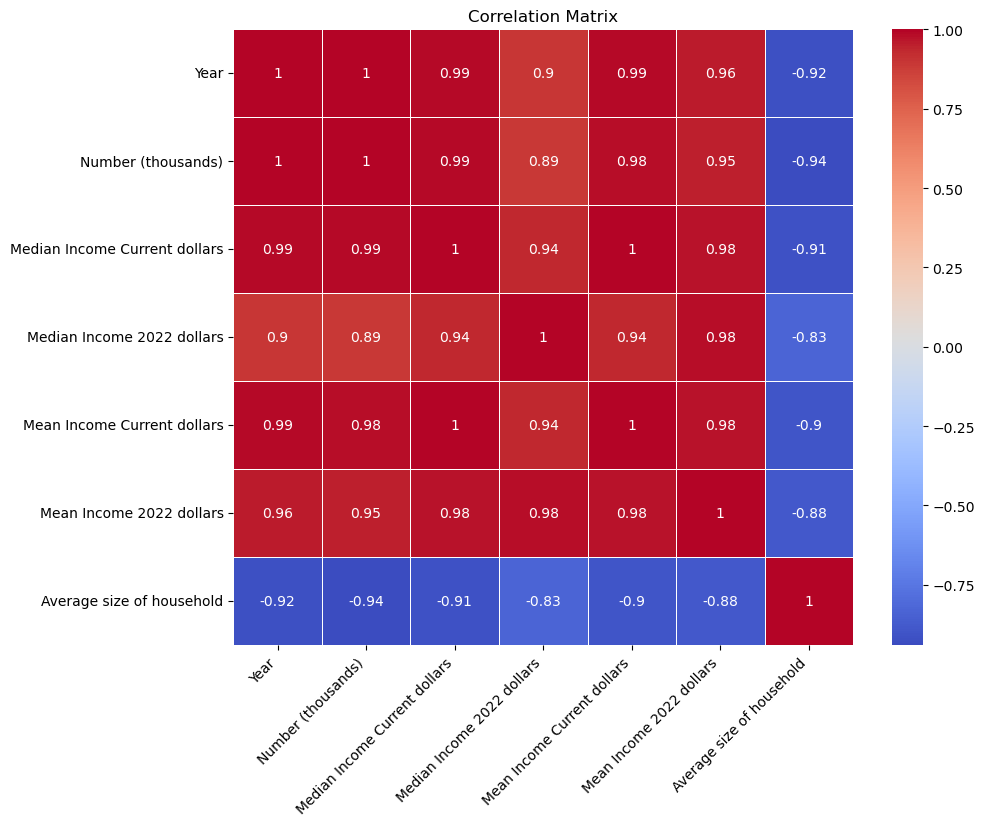

NameError: name 'edited' is not defined

In [362]:
# Use Seaborn to create a heatmap for 'income_df'
corr_matrix = income_df.corr()
plt.figure(figsize=(10, 8))
# Create a heatmap using Seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.xticks(rotation=45, ha="right")
plt.title('Correlation Matrix')
plt.show()

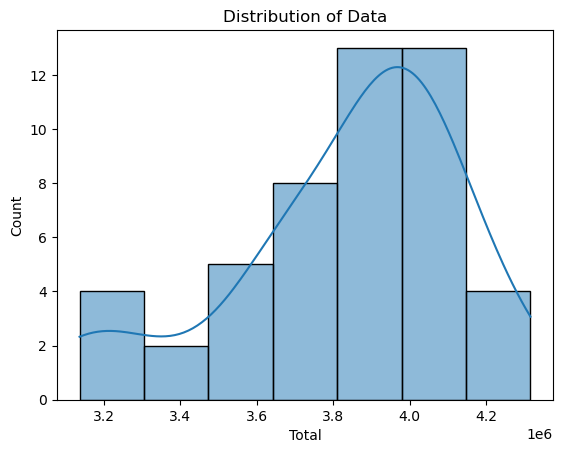

In [369]:
#Distribution of number Births by year 

sns.histplot(births_df['Total'], kde=True)
plt.title('Distribution of Data')
plt.show()

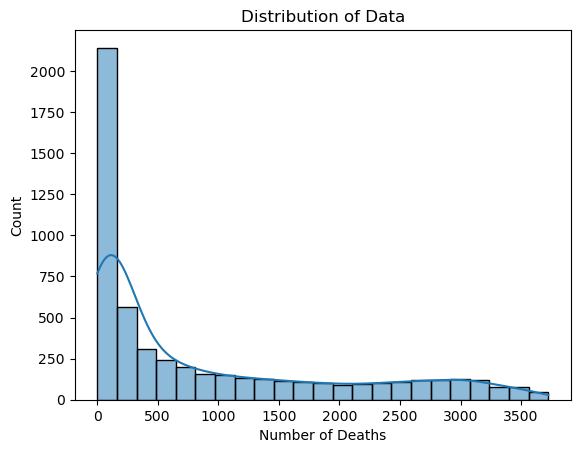

In [370]:
#Distribution of number Deaths by year by age

sns.histplot(bltper_df['Number of Deaths'], kde=True)
plt.title('Distribution of Data')
plt.show()

In [371]:
your_data.to_csv('output.csv', index=False)

NameError: name 'your_data' is not defined

In [372]:
births_df.to_csv('births.csv', index=False)
bltper_df.to_csv('bltper.csv', index=False)
deaths_df.to_csv('deaths.csv', index=False)
population_df.to_csv('population.csv', index=False) 
income_df.to_csv('income.csv', index=False)
per_capita_df.to_csv('percapita.csv', index=False)